In [2]:
from sklearn.datasets import load_digits, make_blobs, load_digits
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, roc_auc_score
from sklearn.metrics.scorer import SCORERS
import numpy as np
import mglearn
import matplotlib.pyplot as plt

In [3]:
# Imbalanced dataset
digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [4]:
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print('Unique predicted labels: {}'.format(np.unique(pred_most_frequent)))
print('Test accuracy: {:.2f}'.format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test accuracy: 0.90


In [5]:
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print('Unique predicted labels: {}'.format(np.unique(pred_tree)))
print('Test accuracy: {:.2f}'.format(tree.score(X_test, y_test)))

Unique predicted labels: [False  True]
Test accuracy: 0.92


In [6]:
dummy = DummyClassifier().fit(X_train, y_train) # default strategy - stratified
pred_dummy = dummy.predict(X_test)
print('Unique predicted labels: {}'.format(np.unique(pred_dummy)))
print('Test accuracy: {:.2f}'.format(dummy.score(X_test, y_test)))

Unique predicted labels: [False  True]
Test accuracy: 0.84


In [7]:
logreg = LogisticRegression(C=0.01, solver='saga').fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print('Test accuracy: {:.2f}'.format(logreg.score(X_test, y_test)))

Test accuracy: 0.98


In [8]:
confusion = confusion_matrix(y_test, pred_logreg)
confusion

array([[401,   2],
       [  8,  39]])

In [9]:
# f1-score - harmonic mean of precision and recall

print('f1 score most frequent: {:.2f}'.format(f1_score(y_test, pred_most_frequent)))
print('f1 score dummy: {:.2f}'.format(f1_score(y_test, pred_dummy)))
print('f1 score tree: {:.2f}'.format(f1_score(y_test, pred_tree)))
print('f1 score logistic regression: {:.2f}'.format(f1_score(y_test, pred_logreg)))

f1 score most frequent: 0.00
f1 score dummy: 0.16
f1 score tree: 0.55
f1 score logistic regression: 0.89


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [10]:
print(classification_report(y_test, pred_most_frequent, target_names=['not nine', 'nine']))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [11]:
print(classification_report(y_test, pred_dummy, target_names=['not nine', 'nine']))

              precision    recall  f1-score   support

    not nine       0.90      0.91      0.91       403
        nine       0.16      0.15      0.16        47

    accuracy                           0.83       450
   macro avg       0.53      0.53      0.53       450
weighted avg       0.82      0.83      0.83       450



In [12]:
print(classification_report(y_test, pred_logreg, target_names=['not nine', 'nine']))

              precision    recall  f1-score   support

    not nine       0.98      1.00      0.99       403
        nine       0.95      0.83      0.89        47

    accuracy                           0.98       450
   macro avg       0.97      0.91      0.94       450
weighted avg       0.98      0.98      0.98       450



In [13]:
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=0.05).fit(X_train, y_train)

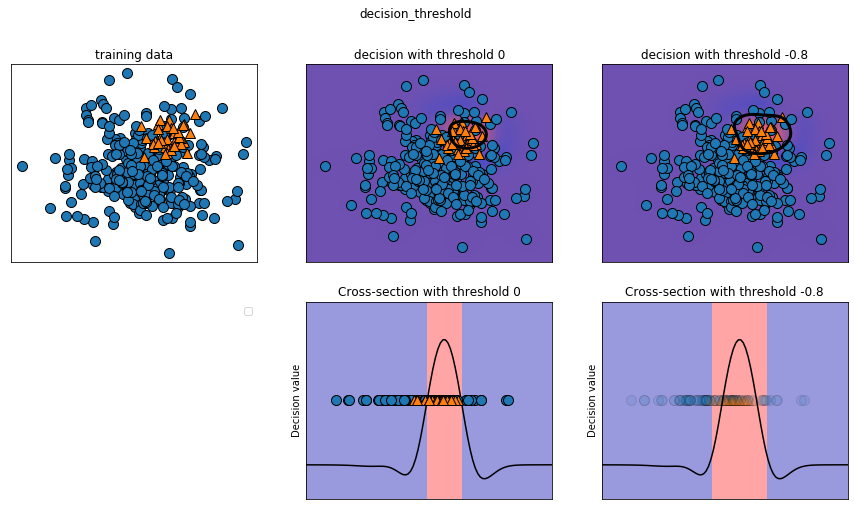

In [14]:
mglearn.plots.plot_decision_threshold()

In [15]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1004
           1       0.64      0.67      0.66       121

    accuracy                           0.92      1125
   macro avg       0.80      0.81      0.81      1125
weighted avg       0.93      0.92      0.93      1125



In [16]:
# Increase recall --> decrease threshold (default == 0)

y_pred_lower_threshold = svc.decision_function(X_test) > -0.8

print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1004
           1       0.56      0.86      0.68       121

    accuracy                           0.91      1125
   macro avg       0.77      0.89      0.81      1125
weighted avg       0.94      0.91      0.92      1125



In [17]:
# Give: ground_truth, predicted uncertainties (predict_proba or decision f-n)
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

Text(0, 0.5, 'Recall')

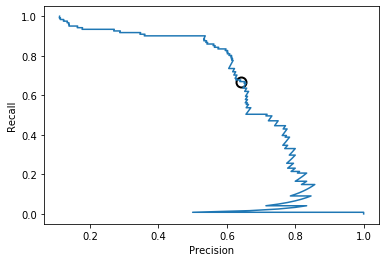

In [18]:
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=0.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

# threshold closest to zero - default by decision function
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label='threshold zero', fillstyle='none', c='k', markeredgewidth=2)
plt.plot(precision, recall, label='precision recall curve')
plt.xlabel('Precision')
plt.ylabel('Recall')

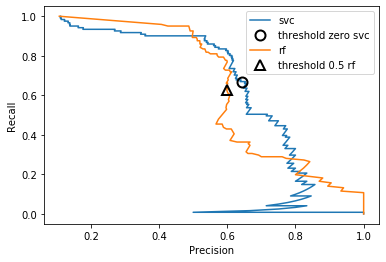

In [19]:
# Compare presicion-recall curves

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# Give ground truth and probability of sample being class 1
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(precision, recall, label='svc')
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label='threshold zero svc', fillstyle='none', c='k', mew=2)

plt.plot(precision_rf, recall_rf, label='rf')
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
         markersize=10, label='threshold 0.5 rf', fillstyle='none', mew=2)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend(loc='best')

In [20]:
print('F1-score of Random Forest: {:.2f}'.format(f1_score(y_test, rf.predict(X_test))))
print('F1-score of SVC: {:.2f}'.format(f1_score(y_test, svc.predict(X_test))))

F1-score of Random Forest: 0.61
F1-score of SVC: 0.66


In [22]:
# Average precision [0;1] -  area under precision-recall curve, way to summarize the precision-recall curve

avr_prec_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
avr_prec_svc = average_precision_score(y_test, svc.decision_function(X_test))

print('Average precision Random Forest: {:.3f}'.format(avr_prec_rf))
print('Average precision SVC: {:.3f}'.format(avr_prec_svc))

Average precision Random Forest: 0.660
Average precision SVC: 0.666


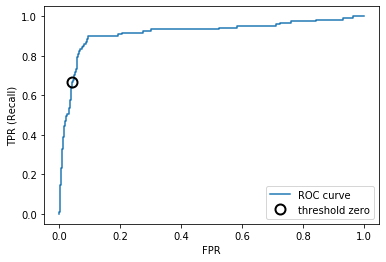

In [23]:
# ROC-curve - receiver operating characteristics curve
# false positive rate (FPR) against true positive rate (TPR, recall)

fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR (Recall)')

# threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label='threshold zero', fillstyle='none', c='k', mew=2)
plt.legend(loc='best')

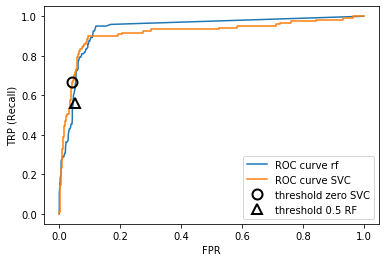

In [24]:
# Compare ROC curves

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr_rf, tpr_rf, label='ROC curve rf')
plt.plot(fpr, tpr, label='ROC curve SVC')

plt.xlabel('FPR')
plt.ylabel('TRP (Recall)')
# default threshold SVC
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label='threshold zero SVC', fillstyle='none', c='k', mew=2)

# default threshold RF
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
         label='threshold 0.5 RF', fillstyle='none', c='k', mew=2)
plt.legend(loc='best')

In [25]:
# ROC AUC - area under the ROC curve

auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

auc_svc = roc_auc_score(y_test, svc.decision_function(X_test))

print('AUC Random forest: {:.3f}'.format(auc_rf))
print('AUC SVC: {:.3f}'.format(auc_svc))

AUC Random forest: 0.937
AUC SVC: 0.916


Gamma: 1, accuracy: 0.90, AUC: 0.500
Gamma: 0.05, accuracy: 0.90, AUC: 0.999
Gamma: 0.01, accuracy: 0.90, AUC: 1.000


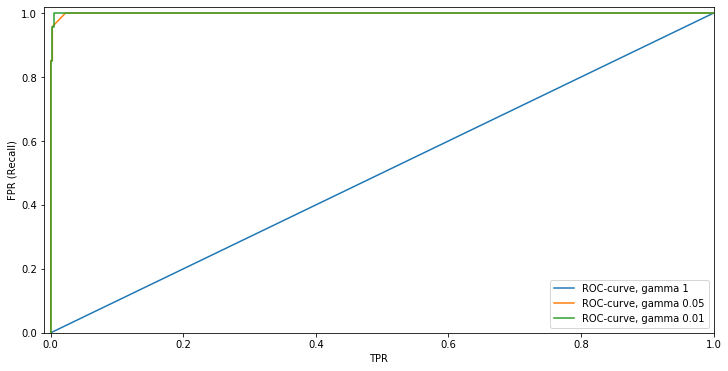

In [26]:
# Compare AUC scores

y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)
plt.figure(figsize=(12, 6))

for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
    print('Gamma: {}, accuracy: {:.2f}, AUC: {:.3f}'.format(gamma, accuracy, auc))
    plt.plot(fpr, tpr, label='ROC-curve, gamma {}'.format(gamma))
plt.xlabel('TPR')
plt.ylabel('FPR (Recall)')
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc='best')

In [27]:
# Multiclass classification

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
lr = LogisticRegression(solver='saga', multi_class='auto', max_iter=100000).fit(X_train, y_train)
pred = lr.predict(X_test)

print('Accuracy: {:.3f}'.format(lr.score(X_test, y_test)))
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, pred)))
print('Confusion matrix: \n{}'.format(confusion_matrix(y_test, pred)))

Accuracy: 0.956
Accuracy: 0.956
Confusion matrix: 
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 42  2  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


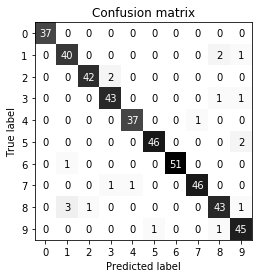

In [28]:
scores_image = mglearn.tools.heatmap(confusion_matrix(y_test, pred), xlabel='Predicted label',
                                     ylabel='True label', xticklabels=digits.target_names,
                                     yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt='%d')
plt.title('Confusion matrix')
plt.gca().invert_yaxis()

In [29]:
# Precision, recall and f-score for each class
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.95      0.97        44
           3       0.93      0.96      0.95        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



In [30]:
print('Micro average F1-score (each sample is important): {:.4f}'.format(f1_score(y_test, pred, average='micro')))
print('Macro average F1-score (each class is important: {:.4f}'.format(f1_score(y_test, pred, average='macro')))
print('Weighted average F1-score (by support): {:.4f}'.format(f1_score(y_test, pred, average='weighted')))

Micro average F1-score (each sample is important): 0.9556
Macro average F1-score (each class is important: 0.9564
Weighted average F1-score (by support): 0.9557


In [31]:
print(sorted(SCORERS.keys()))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'brier_score_loss', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']
